In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('F:\datasets\glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# model building

In [6]:
x=df.iloc[:,:-1]
y=df['Type']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
kn.score(xtrain,ytrain),kn.score(xtest,ytest),print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.71      0.68      0.70        22
           2       0.52      0.80      0.63        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      0.78      0.88         9

    accuracy                           0.69        54
   macro avg       0.71      0.57      0.61        54
weighted avg       0.70      0.69      0.67        54



(0.73125, 0.6851851851851852, None)

In [13]:
actrain=[]
actest=[]
for i in range(1,25):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    ypred=kn.predict(xtest)
    actrain.append(kn.score(xtrain,ytrain))
    actest.append(kn.score(xtest,ytest))
    

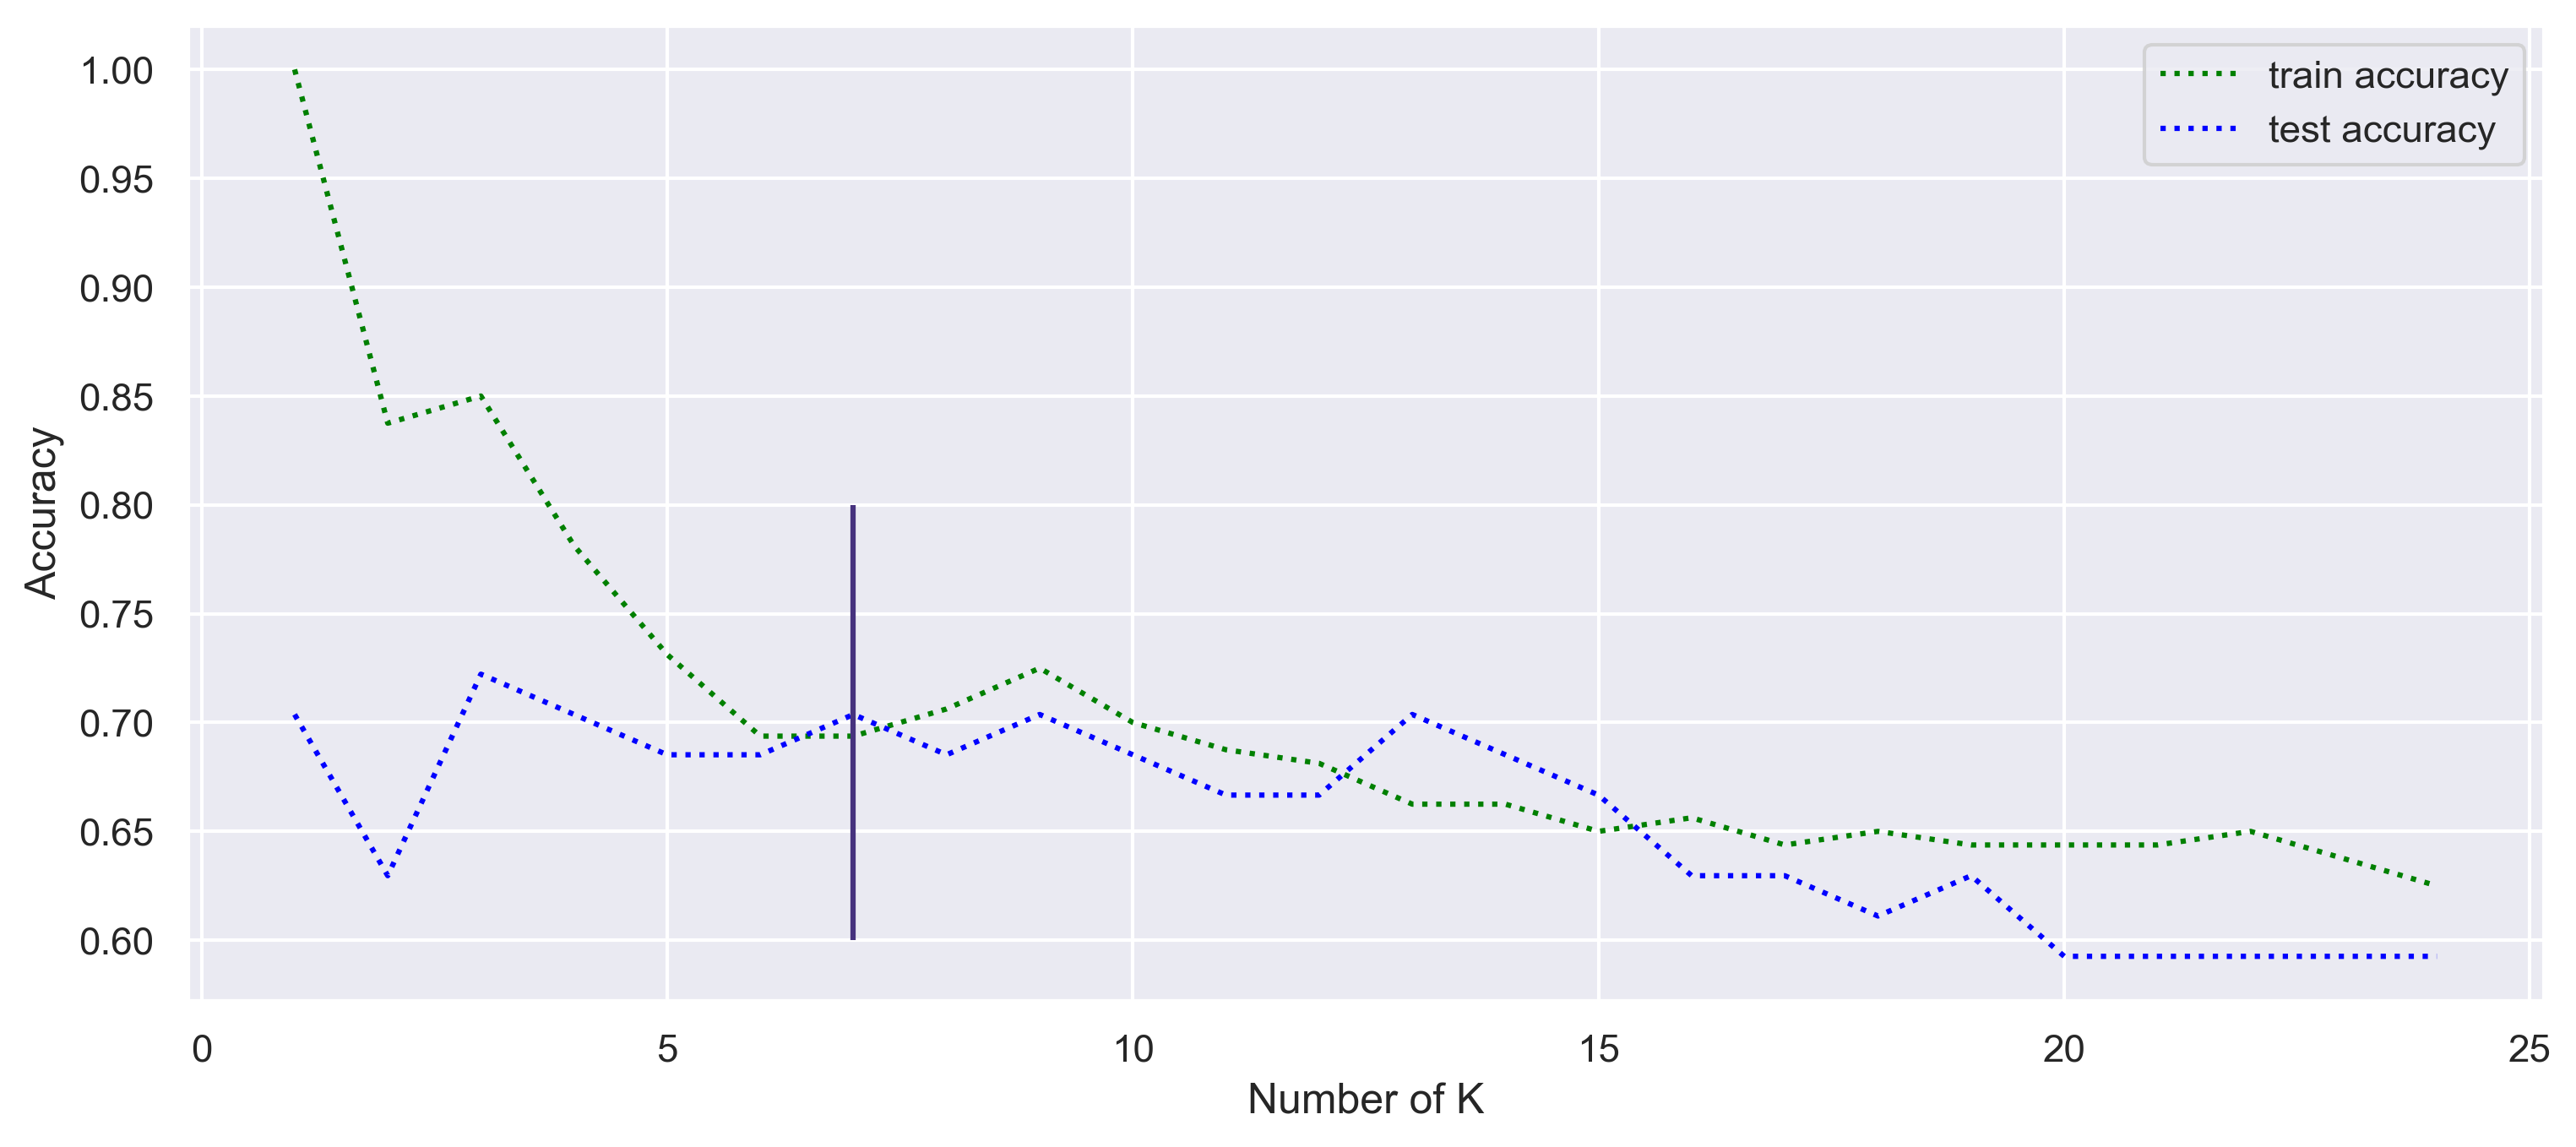

In [14]:
plt.plot(range(1,25),actrain,linestyle=':',color='green',label='train accuracy')
plt.plot(range(1,25),actest,linestyle=':',color='blue',label='test accuracy')
plt.vlines(x=7,ymax=0.8,ymin=0.60)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
kn=KNeighborsClassifier(n_neighbors=7)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
kn.score(xtrain,ytrain),kn.score(xtest,ytest),print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.75      0.68      0.71        22
           2       0.54      0.87      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      0.78      0.88         9

    accuracy                           0.70        54
   macro avg       0.72      0.58      0.62        54
weighted avg       0.72      0.70      0.69        54



(0.69375, 0.7037037037037037, None)

# problem 2

In [16]:
df=pd.read_csv('F:\datasets\Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [17]:
df.drop(columns='animal name',inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [19]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [20]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

<AxesSubplot:>

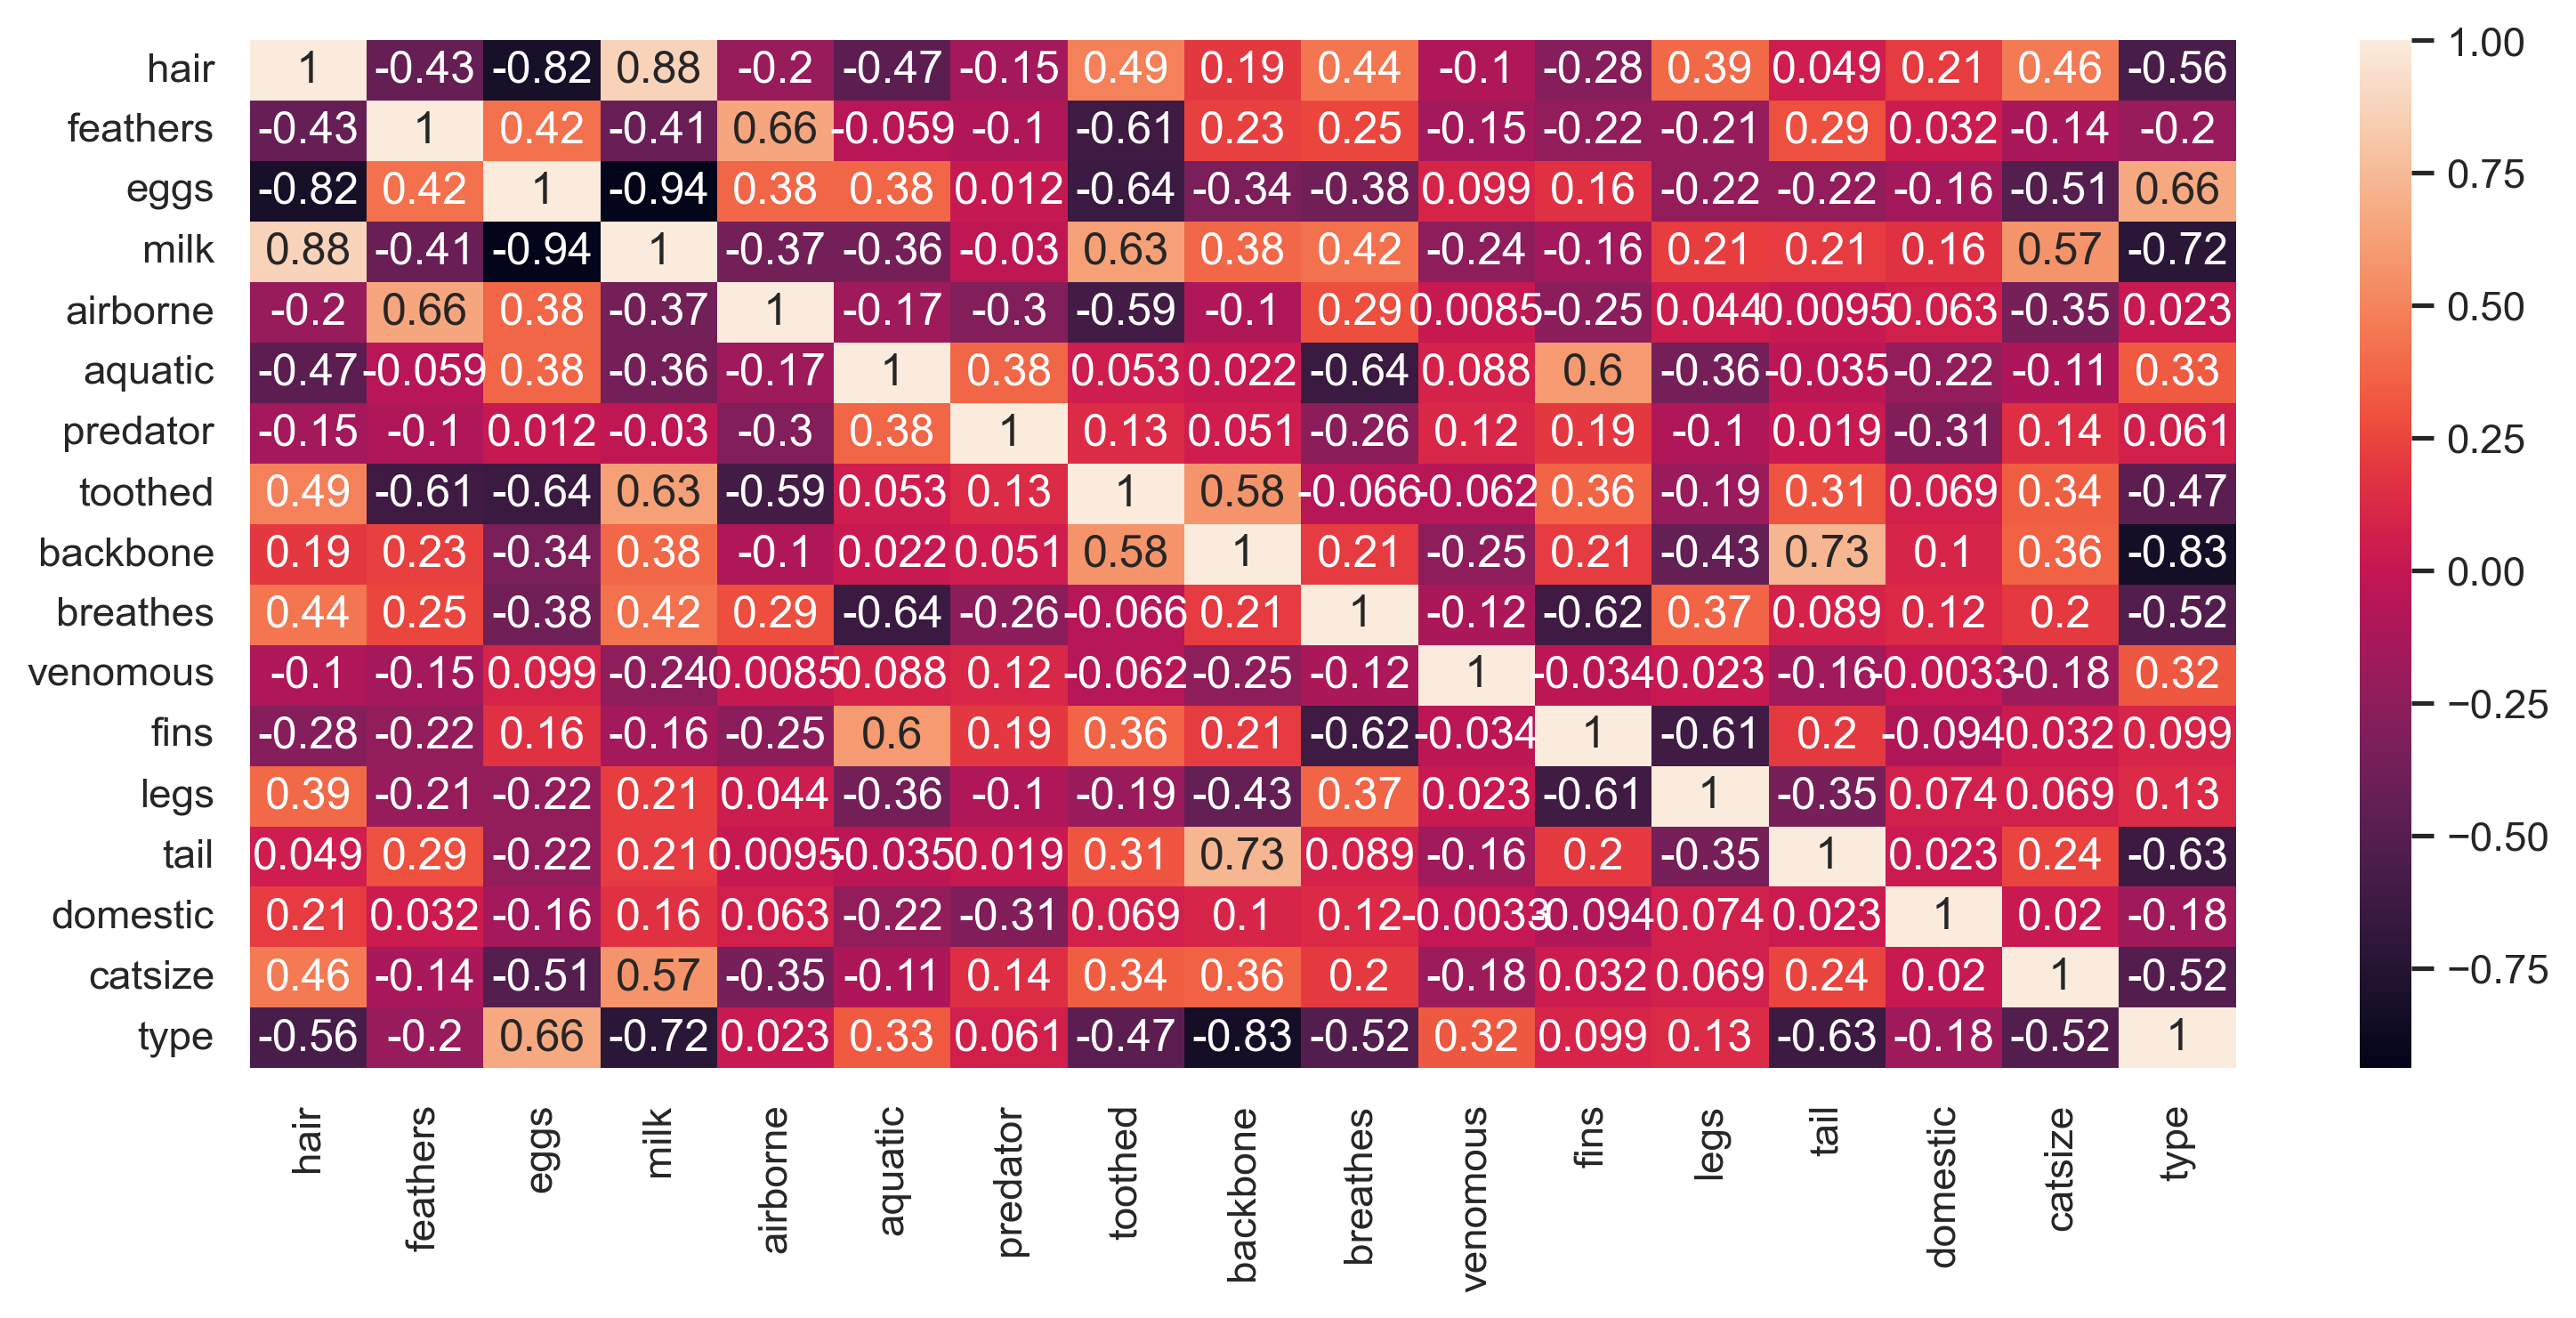

In [21]:
sns.heatmap(df.corr(),annot=True)

In [29]:
x=df.iloc[:,:-1]
y=df['type']

In [30]:
x=sc.fit_transform(x)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

In [32]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
kn.score(xtrain,ytrain),kn.score(xtest,ytest),print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.96        26
   macro avg       0.71      0.71      0.71        26
weighted avg       0.96      0.96      0.96        26



(0.9333333333333333, 0.9615384615384616, None)

In [33]:
actest=[]
actrain=[]
for i in range(1,30):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    actrain.append(kn.score(xtrain,ytrain))
    actest.append(kn.score(xtest,ytest))

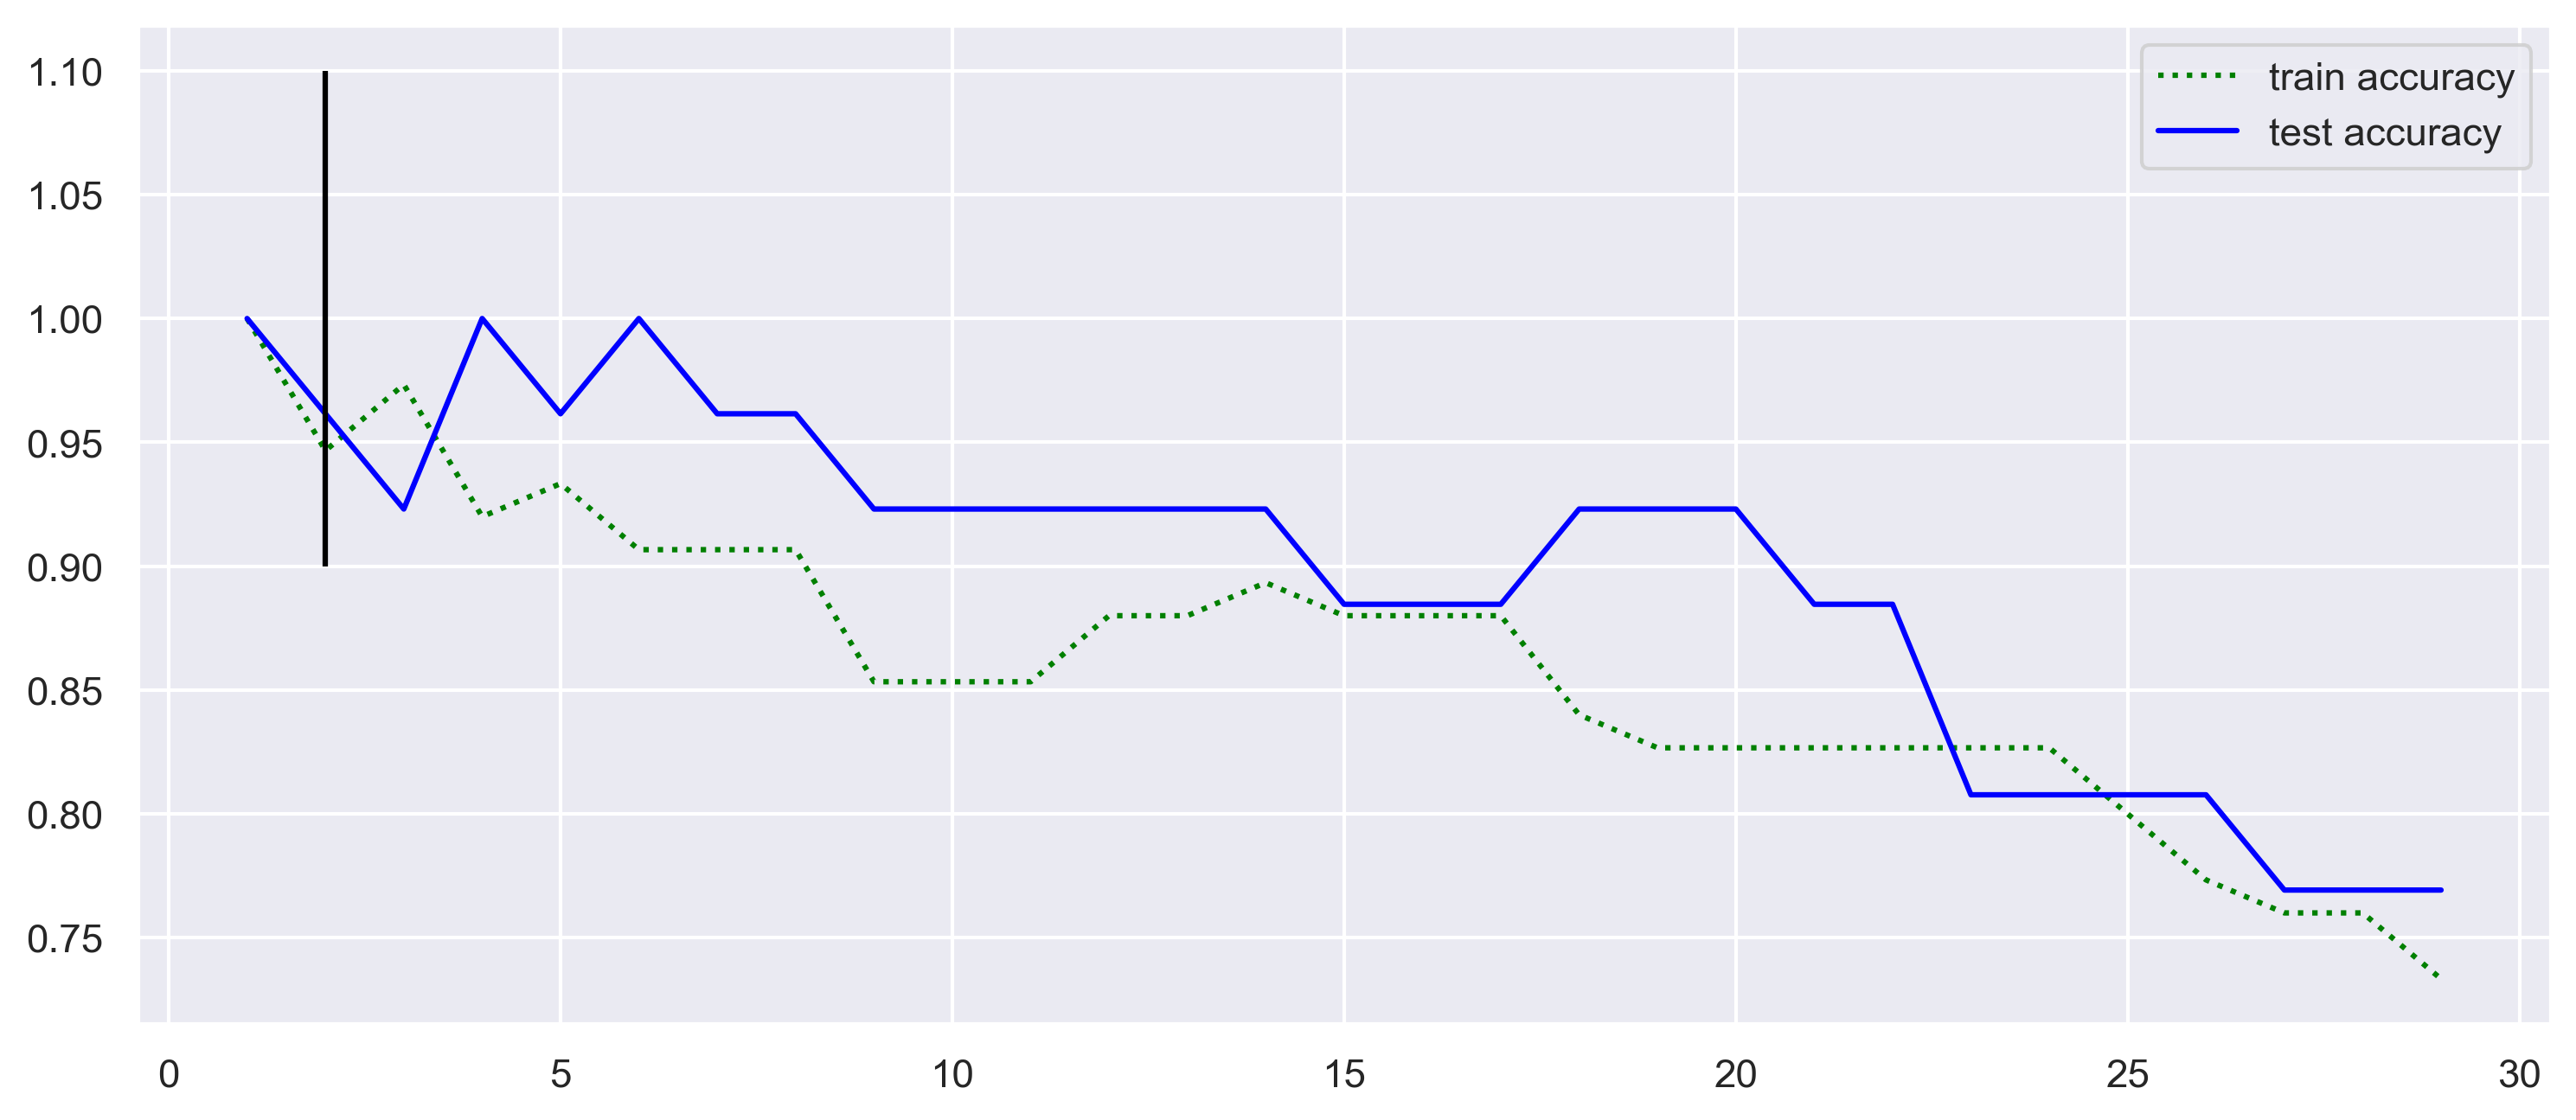

In [34]:
plt.plot(range(1,30),actrain,linestyle=":",label='train accuracy',color='green')
plt.plot(range(1,30),actest,linestyle='-',label='test accuracy',color='blue')
plt.vlines(x=2,ymin=0.9,ymax=1.1,colors='black')
plt.legend()

In [35]:
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
kn.score(xtrain,ytrain),kn.score(xtest,ytest),print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.96        26
   macro avg       0.86      0.81      0.83        26
weighted avg       1.00      0.96      0.98        26



(0.9466666666666667, 0.9615384615384616, None)